<a href="https://colab.research.google.com/github/mgczacki/iap/blob/main/libretas/Tarea1-Ej3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1: Perceptrón y Redes Densas

### Notebook 2 de 3

#### Autor: Mario Horacio Garrido Czacki

Resuelve los siguientes ejercicios en libretas de Colab independientes que sean replicables.

#### 3. Entrena una red completamente conectada para aproximar la compuerta XOR. (3 puntos.)

In [ ]:
# biblioteca para inspeccionar arquitecturas
# https://github.com/tyleryep/torchinfo
!pip install torchinfo

In [1]:
# funciones aleatorias
import random
# tomar n elementos de una secuencia
from itertools import islice as take

# gráficas
import matplotlib.pyplot as plt
# arreglos multidimensionales
import numpy as np
# redes neuronales
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as T
# procesamiento de imágenes
from skimage import io
# redes neuronales
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
# inspección de arquitectura
from torchinfo import summary
# barras de progreso

In [ ]:
# parche para bicho en colab
# https://github.com/pytorch/vision/issues/1938
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [2]:
def set_seed(seed=0):
    """Initializes pseudo-random number generators."""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    
# reproducibilidad
set_seed()

In [3]:
class FCN(nn.Module):
    
    # inicializador
    def __init__(self):
        
        # inicilización del objeto padre, obligatorio
        super(FCN, self).__init__()
        
        # tamaño de las capas
        self.I = 1 * 2
        FC1, FC2 = 2, 1
        
        # definición de capas
        self.cls = nn.Sequential(
            nn.Linear(self.I, FC1),
            nn.Sigmoid(),
            nn.Linear(FC1, FC2)
        )
    
    # método para inferencia
    def forward(self, x):
        x = self.cls(x)
        return x
    def pred(self, x):
        x = self.cls(x)
        m = nn.Sigmoid()
        x = m(x)
        return x

In [4]:
datos = torch.tensor([[0., 0., 0.],
                      [0., 1., 1.],
                      [1., 0., 1.],
                      [1., 1., 0.]])

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
net = FCN()
net = net.to(device)

In [7]:
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.1)

In [8]:
loss_per_epoch = []
loss = 1.0

epochs = 100

In [9]:
for i in range(epochs):
    tl = 0
    for a in datos:
        entrada = a[:2].to(device)
        label = torch.tensor([a[-1]]).to(device)
        # pongo las gradientes en cero
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(entrada)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()
        tl += loss
    tl /= len(datos)
    loss_per_epoch.append(tl)
    if i % 10 == 0:
        print(f"Termina epoch {i} con loss = {tl}")
print('Finished Training')

Termina epoch 0 con loss = 0.7338923215866089
Termina epoch 10 con loss = 0.6980984807014465
Termina epoch 20 con loss = 0.6974194049835205
Termina epoch 30 con loss = 0.6903862953186035
Termina epoch 40 con loss = 0.5958744287490845
Termina epoch 50 con loss = 0.5029785633087158
Termina epoch 60 con loss = 0.4550129473209381
Termina epoch 70 con loss = 0.39579471945762634
Termina epoch 80 con loss = 0.3164921998977661
Termina epoch 90 con loss = 0.23632781207561493
Finished Training


Text(0, 0.5, 'perdida')

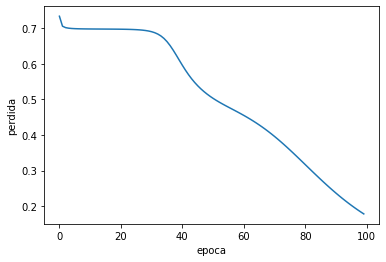

In [10]:
plt.plot(list(range(epochs)), loss_per_epoch)
plt.xlabel("epoca")
plt.ylabel("perdida")

In [11]:
for i in datos:
    print(f"La predicción para {i[0]} y {i[1]} es: {np.round(net.pred(i[:2].to(device)).item())}")

La predicción para 0.0 y 0.0 es: 0.0
La predicción para 0.0 y 1.0 es: 1.0
La predicción para 1.0 y 0.0 es: 1.0
La predicción para 1.0 y 1.0 es: 0.0


Aquí se llegó a generar el XOR de forma correcta debido al round de numpy. Claramente la función de pérdida puede bajar todavía. No obstante, ya que se juzga la salida de la sigmoide final con un umbral de decisión de 0.5, es una aproximación suficiente para resolver el problema.

En este caso decidí tomar 2 neuronas en la capa oculta debido a que se pudo converger con este valor después de 100 épocas al resultado correcto. Supongo que de tomar más neuronas o capas ocultas podría acelerarse la convergencia.

In [12]:
class FCN(nn.Module):
    
    # inicializador
    def __init__(self):
        
        # inicilización del objeto padre, obligatorio
        super(FCN, self).__init__()
        
        # tamaño de las capas
        self.I = 1 * 2
        FC1, FC2 = 20, 1
        
        # definición de capas
        self.cls = nn.Sequential(
            nn.Linear(self.I, FC1),
            nn.Sigmoid(),
            nn.Linear(FC1, FC2)
        )
    
    # método para inferencia
    def forward(self, x):
        x = self.cls(x)
        return x
    def pred(self, x):
        x = self.cls(x)
        m = nn.Sigmoid()
        x = m(x)
        return x

net = FCN()
net = net.to(device)

In [13]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.1)

In [14]:
loss_per_epoch = []
loss = 1.0

epochs = 100

for i in range(epochs):
    tl = 0
    for a in datos:
        entrada = a[:2].to(device)
        label = torch.tensor([a[-1]]).to(device)
        # pongo las gradientes en cero
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(entrada)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()
        tl += loss
    tl /= len(datos)
    loss_per_epoch.append(tl)
    if i % 10 == 0:
        print(f"Termina epoch {i} con loss = {tl}")
print('Finished Training')

Termina epoch 0 con loss = 1.0012823343276978
Termina epoch 10 con loss = 0.700212299823761
Termina epoch 20 con loss = 0.582356333732605
Termina epoch 30 con loss = 0.4045284390449524
Termina epoch 40 con loss = 0.1923912763595581
Termina epoch 50 con loss = 0.08131509274244308
Termina epoch 60 con loss = 0.0431080162525177
Termina epoch 70 con loss = 0.027264362201094627
Termina epoch 80 con loss = 0.019137587398290634
Termina epoch 90 con loss = 0.014342769980430603
Finished Training


Text(0, 0.5, 'perdida')

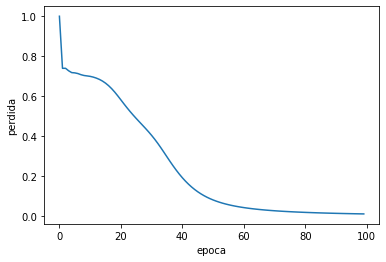

In [15]:
plt.plot(list(range(epochs)), loss_per_epoch)
plt.xlabel("epoca")
plt.ylabel("perdida")

Como lo pensaba, se acelera la convergencia ya que el modelo es mucho más poderoso al tener más neuronas en la capa oculta. Ahora intentaré con una sola neurona en la capa oculta.

In [16]:
class FCN(nn.Module):
    
    # inicializador
    def __init__(self):
        
        # inicilización del objeto padre, obligatorio
        super(FCN, self).__init__()
        
        # tamaño de las capas
        self.I = 1 * 2
        FC1, FC2 = 1, 1
        
        # definición de capas
        self.cls = nn.Sequential(
            nn.Linear(self.I, FC1),
            nn.Sigmoid(),
            nn.Linear(FC1, FC2)
        )
    
    # método para inferencia
    def forward(self, x):
        x = self.cls(x)
        return x
    def pred(self, x):
        x = self.cls(x)
        m = nn.Sigmoid()
        x = m(x)
        return x

net = FCN()
net = net.to(device)

In [17]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.1)

In [18]:
loss_per_epoch = []
loss = 1.0

epochs = 1000

for i in range(epochs):
    tl = 0
    for a in datos:
        entrada = a[:2].to(device)
        label = torch.tensor([a[-1]]).to(device)
        # pongo las gradientes en cero
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(entrada)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()
        tl += loss
    tl /= len(datos)
    loss_per_epoch.append(tl)
    if i % 100 == 0:
        print(f"Termina epoch {i} con loss = {tl}")
print('Finished Training')

Termina epoch 0 con loss = 0.8087544441223145
Termina epoch 100 con loss = 0.5167893767356873
Termina epoch 200 con loss = 0.4955592155456543
Termina epoch 300 con loss = 0.48997431993484497
Termina epoch 400 con loss = 0.4874846935272217
Termina epoch 500 con loss = 0.48609086871147156
Termina epoch 600 con loss = 0.48520421981811523
Termina epoch 700 con loss = 0.484592080116272
Termina epoch 800 con loss = 0.48414501547813416
Termina epoch 900 con loss = 0.48380428552627563
Finished Training


Text(0, 0.5, 'perdida')

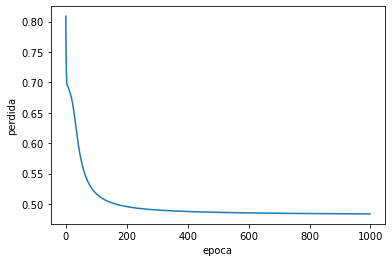

In [19]:
plt.plot(list(range(epochs)), loss_per_epoch)
plt.xlabel("epoca")
plt.ylabel("perdida")

Claramente parece para un modelo con una sola capa oculta, la mínima representación que resuelve el problema es con 2 neuronas ocultas. Cuando hay una sola no se logra predecir correctamente y cuando hay más se tiene una convergencia más rápida (aunque para problemas del mundo real esto podría causar que el modelo se sobreajuste más fácilmente.)

Otro factor que afecta la convergencia es el learning rate. Intenté con el que tiene por defecto Adam y aunque la red de dos neuronas en la capa oculta si converge, tarda demasiado. Aumentar el learning rate entonces aumentó la velocidad de convergencia.